In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2
import matplotlib.pyplot as plt

In [2]:
train_wave_path='wave/training/'
test_wave_path='wave/testing/'

In [3]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [4]:
train = train_datagen_aug.flow_from_directory(
    train_wave_path,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    class_mode='binary'
)

Found 72 images belonging to 2 classes.


In [5]:
test = test_datagen.flow_from_directory(
    test_wave_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 30 images belonging to 2 classes.


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization with 50% dropout rate

model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(
    train,
    epochs=48,
    batch_size=32,
    validation_data=test
)

Epoch 1/48


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4714 - loss: 1.1188 - val_accuracy: 0.5000 - val_loss: 1.1848
Epoch 2/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4750 - loss: 1.0742 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 3/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5132 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4115 - loss: 0.7003 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 5/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5434 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 6/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5130 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 7/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4090 - loss: 0.7238 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 8/48
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4861 - loss: 0.7151 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 9/48
3/3 ━━━━━━━━━━━━

In [9]:
test_loss, test_acc = model.evaluate(test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8000 - loss: 0.5684
Test accuracy: 0.800000011920929


(1, 224, 224, 3)

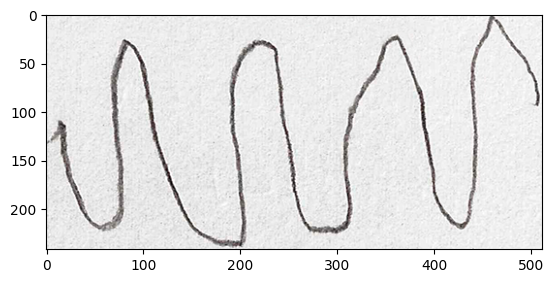

In [31]:
path=cv2.imread('wave/testing/healthy/V55HO11.png')
path.shape
roi_g = cv2.resize(path,(224,224))
plt.imshow(path)
roi = img_to_array(roi_g)

img_array = roi/ 255.0
#roi = img_to_array(img_array)
roi_1 = np.expand_dims(img_array,axis=0)
roi_1.shape

In [32]:
predictions = model.predict(roi_1)[0]
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([0.01292744], dtype=float32)

In [33]:
if predictions>0.5:
    print('Parkinson')
elif predictions<0.5:
    print('Healthy')
else:
    print('Invalid')

Healthy


In [34]:
model.save('parkinsons.h5')

0

In [23]:
predictions = model.predict(test, steps=len(test))

# Optionally, get the class labels
predicted_classes = predictions.argmax(axis=-1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


array([[0.00522699],
       [0.06385611],
       [0.80798537],
       [0.03294417],
       [0.9792934 ],
       [0.99817294],
       [0.00574399],
       [0.51569796],
       [0.8824868 ],
       [0.38335276],
       [0.3912273 ],
       [0.29639238],
       [0.9112956 ],
       [0.08240599],
       [0.04146298],
       [0.00719781],
       [0.1752203 ],
       [0.00505172],
       [0.86793065],
       [0.99564517],
       [0.556254  ],
       [0.09780451],
       [0.99996865],
       [0.5144136 ],
       [0.00371413],
       [0.87765837],
       [0.03966982],
       [0.99556494],
       [0.56450915],
       [0.9284215 ]], dtype=float32)